## Markov Chain Monte Carlo Simulation

### Metropolis Method

For simplicity, we will consider Ising model here. 

With Metropolis method, each Monte Carlo step, will randomly choose a spin and change its flip the spin:

1. if the new state has lower energy, we accept the flipping
2. if the new state has higher energy, we accept the flipping with $e^{-\beta\Delta E}$ chance.

#### Example:

Consider a 2 dimensional Ising model without external field:

$$H=-J\Sigma_{<ij>}\sigma_i\sigma_j$$

The analytic result was solved by Onsager:

$$T_c = \frac{2J}{k_B ln(1+\sqrt{2})}$$

#### Code Example (Julia language):

Assume that $J=k_B$.

Thus the analytic result is 2.27K.

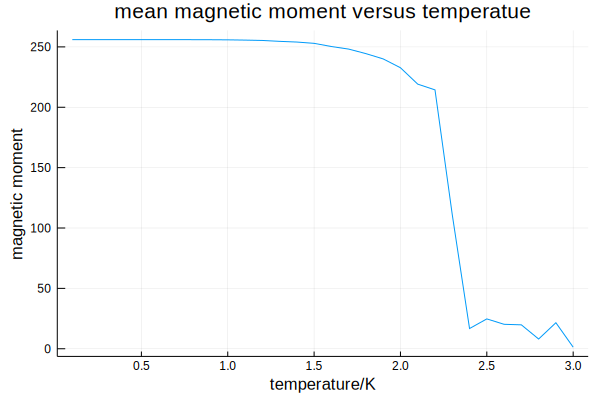

In [23]:
using Random
using Plots

# define functions
function neighbor(lattice, x, y)
    # sum magnetic moments of neighbors with periodic boundary condition
    result = 0
    xMax = size(lattice)[1]
    yMax = size(lattice)[2]
    
    if x == 1
        result += lattice[xMax, y]
    else
        result += lattice[x-1, y]
    end
    
    if x == xMax
        result += lattice[1, y]
    else
        result += lattice[x+1, y]
    end
    
    if y == 1
        result += lattice[x, yMax]
    else
        result += lattice[x, y-1]
    end
    
    if y == yMax
        result += lattice[x, 1]
    else
        result += lattice[x, y+1]
    end
    
    return result
end

# define variables
lattice = Array{Int32}(undef, 16, 16)  # 16*16 lattice with periodic boundary condition
temperature = Array{Float64}(undef, 30)  # 30 different temperatures 
magnetic = Array{Float64}(undef, 30)  # 30 magnetic moments at different temperatures
nDrop = 256000  # Monte Carlo steps to get equilibrium state
n = 256  # Monte Carlo steps to get statistical independent 
N = 1000  # the number of magnetic moments averaged

# initialize varables
lattice .= 1
temperature = 0.1:0.1:3.0
magnetic .= 0

# initialize random generator
rng = RandomDevice()

# Monte Carlo simulation at different temperatures
magneticMoment = 16*16
for i in 1:30
    T = temperature[i]
    
    # calculate some factor to simplify looping
    probability1 = exp(-8/T)
    probability2 = exp(-4/T)
    
    # get to equilibrium state
    for j in 1:nDrop
        # choose a spin randomly
        x = rand(rng, 1:16)
        y = rand(rng, 1:16)
        
        # calculate magnetic moment of nearest neighbor
        mNeighbor = neighbor(lattice, x, y)
        mNeighbor *= lattice[x, y]
        
        # flip the spin
        if mNeighbor == 4
            if rand(rng) < probability1
                magneticMoment -= 2*lattice[x, y]
                lattice[x, y] = -lattice[x, y]
            end
        elseif mNeighbor == 2
            if rand(rng) < probability2
                magneticMoment -= 2*lattice[x, y]
                lattice[x, y] = -lattice[x, y]
            end
        else
            magneticMoment -= 2*lattice[x, y]
            lattice[x, y] = -lattice[x, y]
        end
    end
    
    # Monte Carlo simulation
    for j in 1:N
        for k in 1:n
            # choose a spin randomly
            x = rand(rng, 1:16)
            y = rand(rng, 1:16)

            # calculate magnetic moment of nearest neighbor
            mNeighbor = neighbor(lattice, x, y)
            mNeighbor *= lattice[x, y]

            # flip the spin
            if mNeighbor == 4
                if rand(rng) < probability1
                    magneticMoment -= 2*lattice[x, y]
                    lattice[x, y] = -lattice[x, y]
                end
            elseif mNeighbor == 2
                if rand(rng) < probability2
                    magneticMoment -= 2*lattice[x, y]
                    lattice[x, y] = -lattice[x, y]
                end
            else
                magneticMoment -= 2*lattice[x, y]
                lattice[x, y] = -lattice[x, y]
            end
        end
        
        magnetic[i] += magneticMoment
    end
    
    magnetic[i] /= N
end

# plot the figure
plot(temperature, abs.(magnetic), leg=false, title="mean magnetic moment versus temperatue", xlabel="temperature/K", ylabel="magnetic moment")